In [1]:
# Load the needed libraries and turn off warning
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
warnings.filterwarnings('ignore')
pd.options.mode.chained_assignment=None

In [2]:
# Read the CSV
data = pd.read_csv('KNN_Project_Data')

In [3]:
# Shape
print('Number of rows: ',data.shape[0])
print('Number of columns: ',data.shape[1])

Number of rows:  1000
Number of columns:  11


In [4]:
# Head and Tail of the dataset
data

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0
...,...,...,...,...,...,...,...,...,...,...,...
995,1343.060600,1289.142057,407.307449,567.564764,1000.953905,919.602401,485.269059,668.007397,1124.772996,2127.628290,0
996,938.847057,1142.884331,2096.064295,483.242220,522.755771,1703.169782,2007.548635,533.514816,379.264597,567.200545,1
997,921.994822,607.996901,2065.482529,497.107790,457.430427,1577.506205,1659.197738,186.854577,978.340107,1943.304912,1
998,1157.069348,602.749160,1548.809995,646.809528,1335.737820,1455.504390,2788.366441,552.388107,1264.818079,1331.879020,1


In [5]:
# Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   XVPM          1000 non-null   float64
 1   GWYH          1000 non-null   float64
 2   TRAT          1000 non-null   float64
 3   TLLZ          1000 non-null   float64
 4   IGGA          1000 non-null   float64
 5   HYKR          1000 non-null   float64
 6   EDFS          1000 non-null   float64
 7   GUUB          1000 non-null   float64
 8   MGJM          1000 non-null   float64
 9   JHZC          1000 non-null   float64
 10  TARGET CLASS  1000 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 86.1 KB


In [6]:
# Describe
data.describe()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,1055.071157,991.851567,1529.373525,495.107156,940.590072,1550.637455,1561.003252,561.346117,1089.067338,1452.521629,0.50000
std,370.980193,392.278890,640.286092,142.789188,345.923136,493.491988,598.608517,247.357552,402.666953,568.132005,0.50025
min,21.170000,21.720000,31.800000,8.450000,17.930000,27.930000,31.960000,13.520000,23.210000,30.890000,0.00000
25%,767.413366,694.859326,1062.600806,401.788135,700.763295,1219.267077,1132.097865,381.704293,801.849802,1059.499689,0.00000
50%,1045.904805,978.355081,1522.507269,500.197421,939.348662,1564.996551,1565.882879,540.420379,1099.087954,1441.554053,0.50000
75%,1326.065178,1275.528770,1991.128626,600.525709,1182.578166,1891.937040,1981.739411,725.762027,1369.923665,1864.405512,1.00000
max,2117.000000,2172.000000,3180.000000,845.000000,1793.000000,2793.000000,3196.000000,1352.000000,2321.000000,3089.000000,1.00000


In [7]:
# Checking for missing columns
data.isnull().sum()

XVPM            0
GWYH            0
TRAT            0
TLLZ            0
IGGA            0
HYKR            0
EDFS            0
GUUB            0
MGJM            0
JHZC            0
TARGET CLASS    0
dtype: int64

In [8]:
# Columns
data.columns

Index(['XVPM', 'GWYH', 'TRAT', 'TLLZ', 'IGGA', 'HYKR', 'EDFS', 'GUUB', 'MGJM',
       'JHZC', 'TARGET CLASS'],
      dtype='object')

# Exploratory Data Analysis

In [9]:
sns.set_palette('GnBu_r')
sns.set_style('whitegrid')

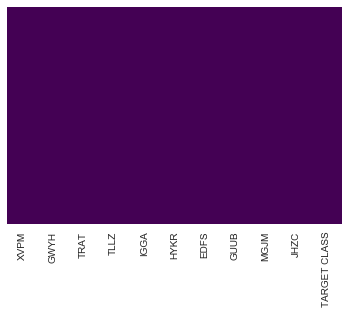

In [10]:
# Heatmap for missing columns
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

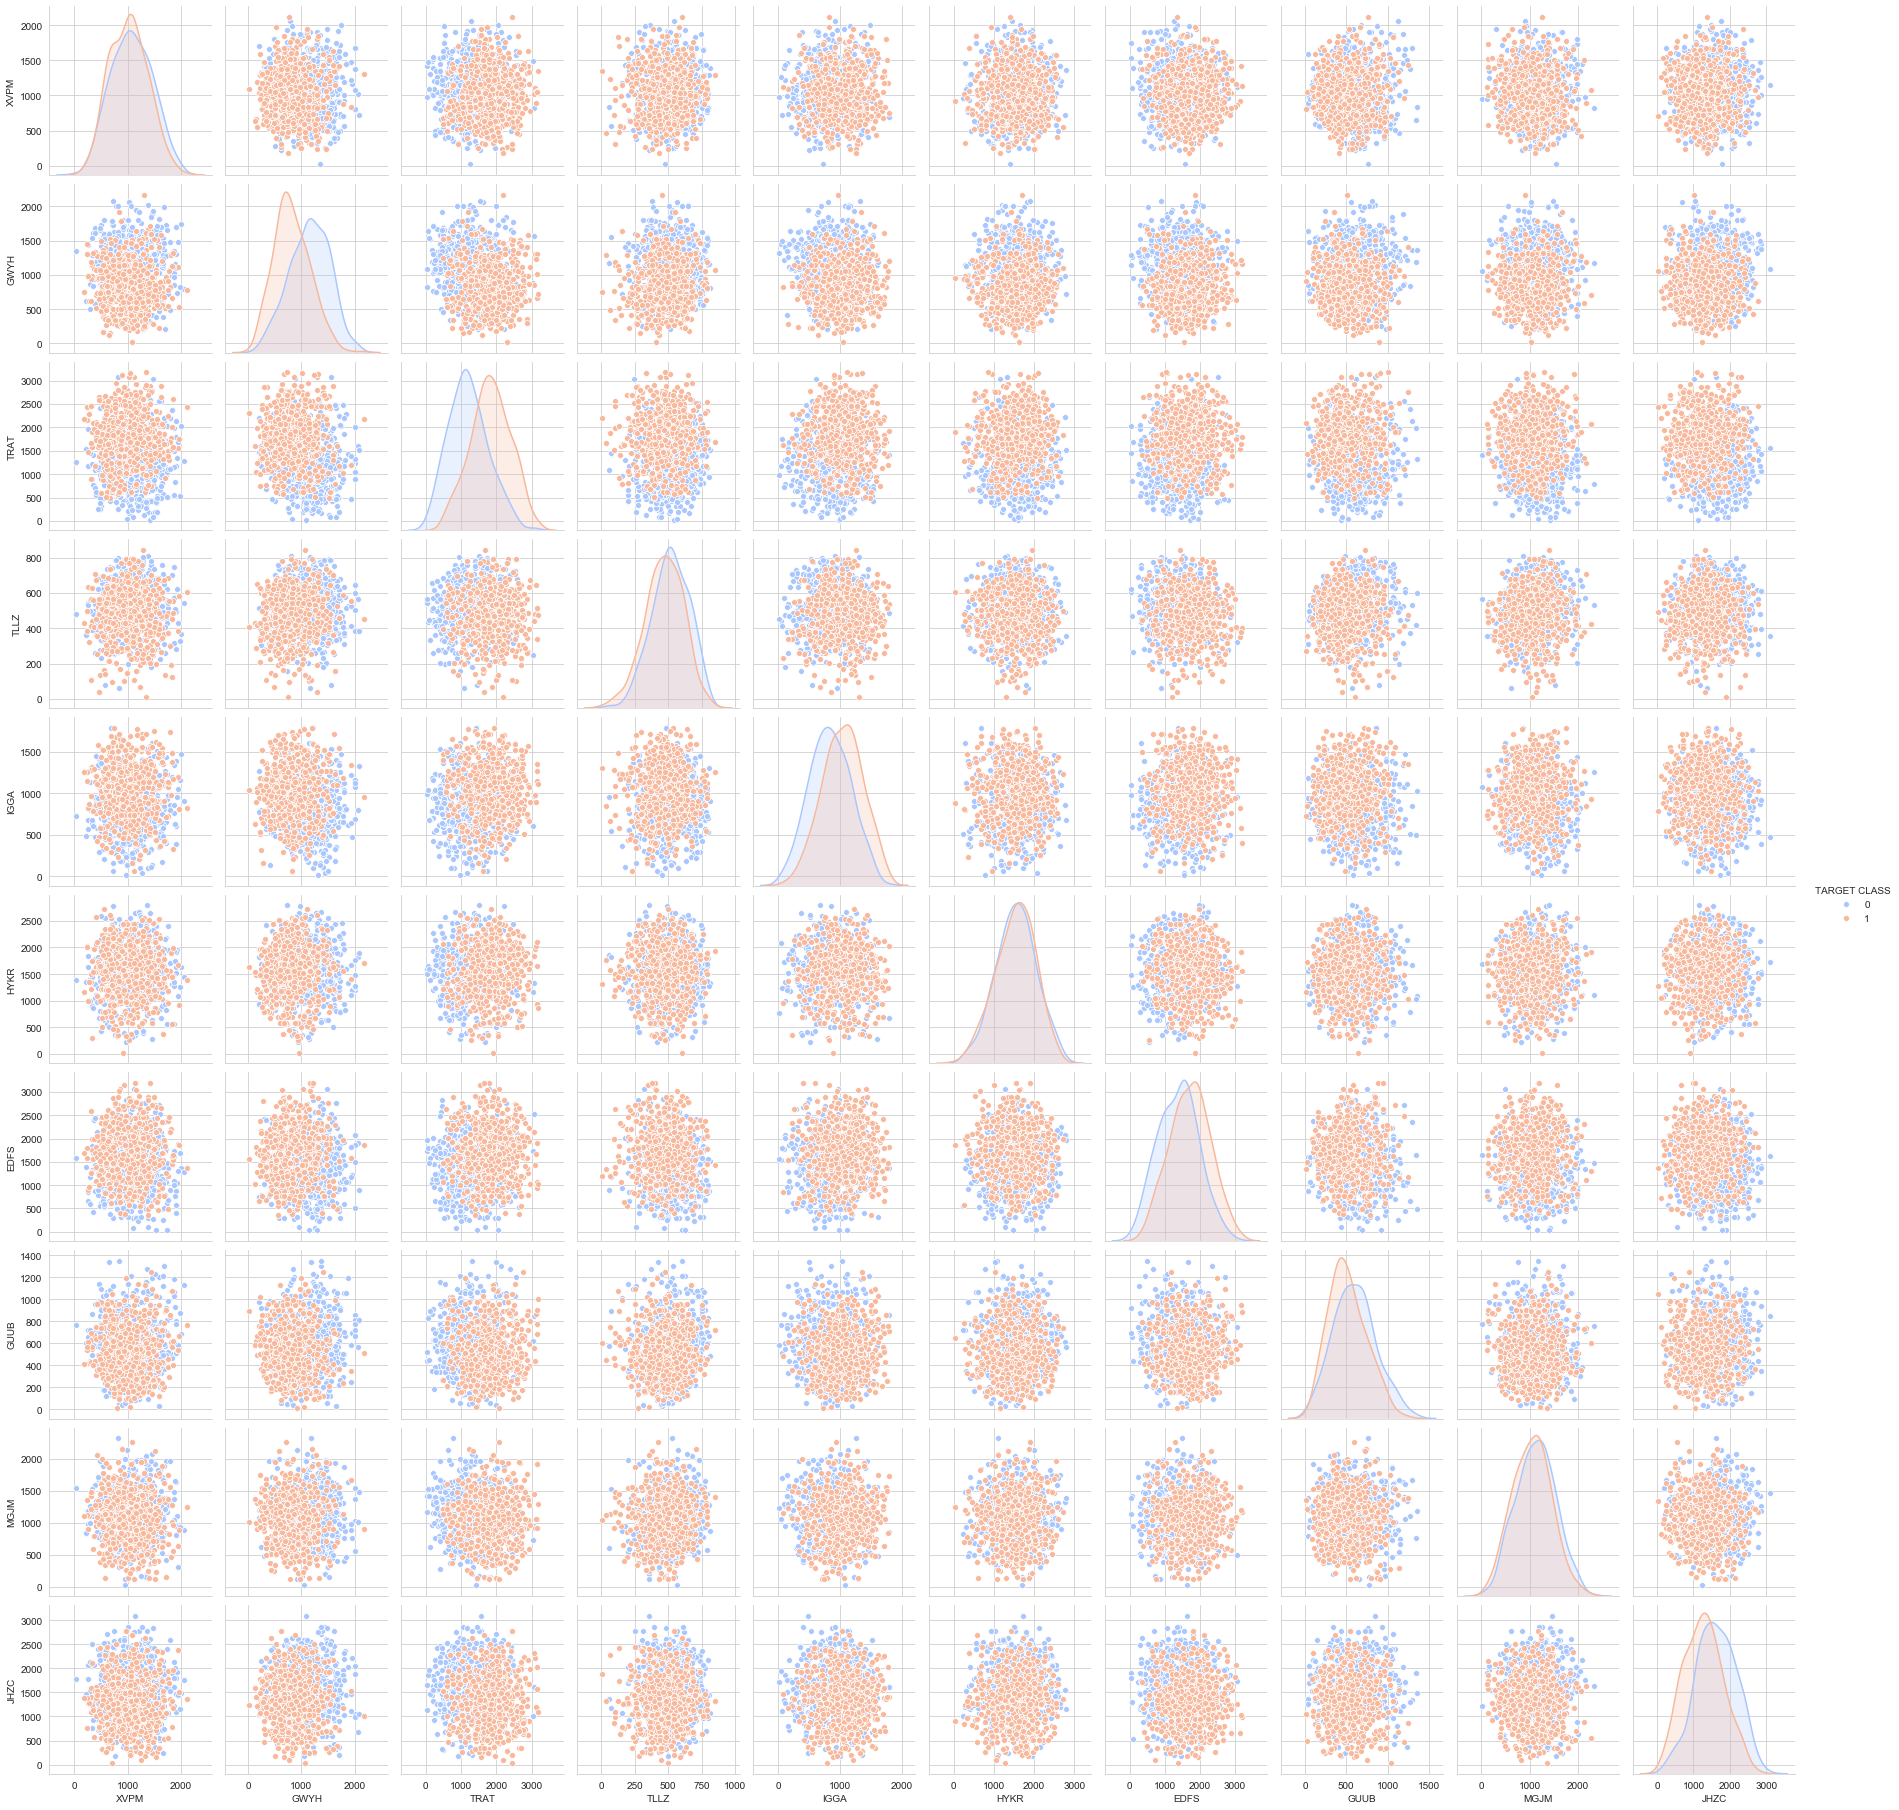

In [30]:
# Pairplot
sns.pairplot(data, hue = 'TARGET CLASS', palette='coolwarm')

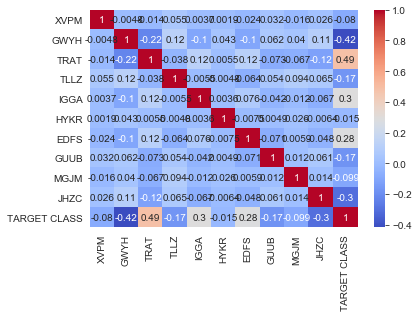

In [12]:
# Heatmap
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')

In [13]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data.drop('TARGET CLASS', axis=1))
rescaled = scaler.transform(data.drop('TARGET CLASS', axis=1))
data_feat = pd.DataFrame(rescaled, columns=data.columns[:-1])

In [14]:
# Splitting of columns into X and y
X = data_feat
y = data['TARGET CLASS']

In [15]:
# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [16]:
# Create and train model
from sklearn.neighbors import KNeighborsClassifier
knn1 = KNeighborsClassifier(n_neighbors=1)
knn1.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [17]:
# Prediction
y_pred = knn1.predict(X_test)

In [18]:
# Checking for evaluation metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print('KNN Accuracy{n=1}: ',accuracy_score(y_test, y_pred))
print('\n')
print('Classification Report: \n',classification_report(y_test, y_pred))
print('\n')
print('Confusion Matrix: \n',confusion_matrix(y_test, y_pred))

KNN Accuracy{n=1}:  0.72


Classification Report: 
               precision    recall  f1-score   support

           0       0.73      0.72      0.72       152
           1       0.71      0.72      0.72       148

    accuracy                           0.72       300
   macro avg       0.72      0.72      0.72       300
weighted avg       0.72      0.72      0.72       300



Confusion Matrix: 
 [[109  43]
 [ 41 107]]


In [21]:
# Checking through numerous KNN value
k_range = range(1, 50)
error_rate = []
for k in k_range:
    knn2 = KNeighborsClassifier(n_neighbors=k)
    knn2.fit(X_train, y_train)
    y_pred2 = knn2.predict(X_test)
    error_rate.append(accuracy_score(y_test, y_pred2))    

In [22]:
knn3 = KNeighborsClassifier(n_neighbors=31)
knn3.fit(X_train, y_train)
y_pred3 = knn3.predict(X_test)

In [23]:
print('KNN Accuracy{n=31}: ',accuracy_score(y_test, y_pred3))
print('\n')
print('Classification Report: \n',classification_report(y_test, y_pred3))
print('\n')
print('Confusion Matrix: \n',confusion_matrix(y_test, y_pred3))

KNN Accuracy{n=31}:  0.84


Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.81      0.84       152
           1       0.82      0.87      0.84       148

    accuracy                           0.84       300
   macro avg       0.84      0.84      0.84       300
weighted avg       0.84      0.84      0.84       300



Confusion Matrix: 
 [[123  29]
 [ 19 129]]


In [26]:
knn4 = KNeighborsClassifier(n_neighbors=37)
knn4.fit(X_train, y_train)
y_pred4 = knn4.predict(X_test)

In [27]:
print('KNN Accuracy{n=37}: ',accuracy_score(y_test, y_pred4))
print('\n')
print('Classification Report: \n',classification_report(y_test, y_pred4))
print('\n')
print('Confusion Matrix: \n',confusion_matrix(y_test, y_pred4))

KNN Accuracy{n=37}:  0.84


Classification Report: 
               precision    recall  f1-score   support

           0       0.86      0.82      0.84       152
           1       0.82      0.86      0.84       148

    accuracy                           0.84       300
   macro avg       0.84      0.84      0.84       300
weighted avg       0.84      0.84      0.84       300



Confusion Matrix: 
 [[125  27]
 [ 21 127]]


In [28]:
knn5 = KNeighborsClassifier(n_neighbors=39)
knn5.fit(X_train, y_train)
y_pred5 = knn5.predict(X_test)

In [29]:
print('KNN Accuracy{n=39}: ',accuracy_score(y_test, y_pred5))
print('\n')
print('Classification Report: \n',classification_report(y_test, y_pred5))
print('\n')
print('Confusion Matrix: \n',confusion_matrix(y_test, y_pred5))

KNN Accuracy{n=39}:  0.84


Classification Report: 
               precision    recall  f1-score   support

           0       0.86      0.82      0.84       152
           1       0.82      0.86      0.84       148

    accuracy                           0.84       300
   macro avg       0.84      0.84      0.84       300
weighted avg       0.84      0.84      0.84       300



Confusion Matrix: 
 [[125  27]
 [ 21 127]]
